<a href="https://colab.research.google.com/github/augustinanobidiegwu/Corona-Virus-Image-Project/blob/main/Restaurant_customer_tips_habit_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TipTrend Insights: Dinning Behaviour Analytics**

In [1]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Loading the dataset from seaborn
data = sns.load_dataset('tips')


In [3]:
#This is to inspect the loaded dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
#This is to display the top 5 rows
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
#This is to display the bottom 5 rows
data.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


**Univariate** **Analysis**

<Axes: xlabel='sex', ylabel='count'>

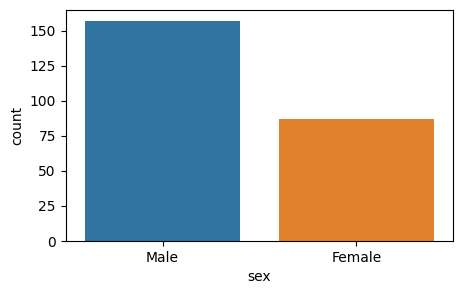

In [6]:
#what is the total number of customer by sex(male and female)
plt.figure(figsize = (5,3))
sns.countplot(x =data['sex'])

<Axes: xlabel='smoker', ylabel='count'>

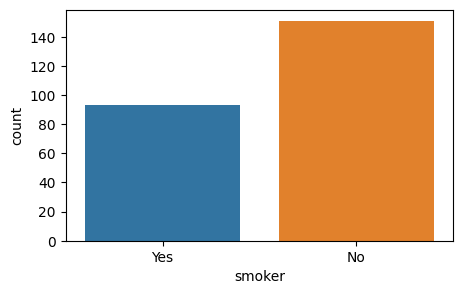

In [7]:
#what is the total number of customer by smoker(Yes and No)
plt.figure (figsize = (5,3))
sns.countplot(x =data['smoker'])

<Axes: xlabel='day', ylabel='count'>

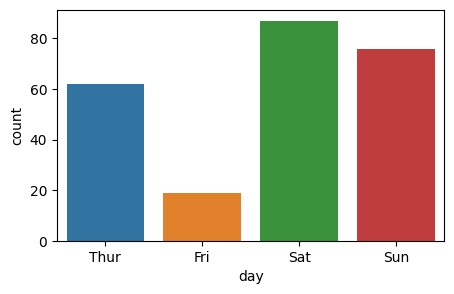

In [8]:
#what day or days have record the highest customers activities
plt.figure (figsize = (5,3))
sns.countplot(x =data['day'])

<Axes: xlabel='time', ylabel='count'>

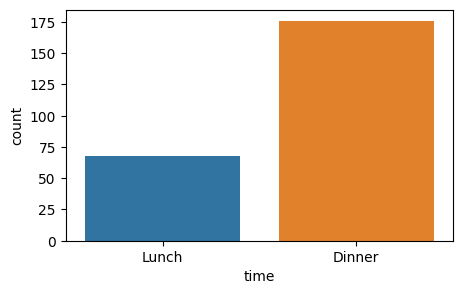

In [9]:
#what time(lunch or dinner) do most customer visit
plt.figure (figsize = (5,3))
sns.countplot(x =data['time'])

<Axes: xlabel='size', ylabel='count'>

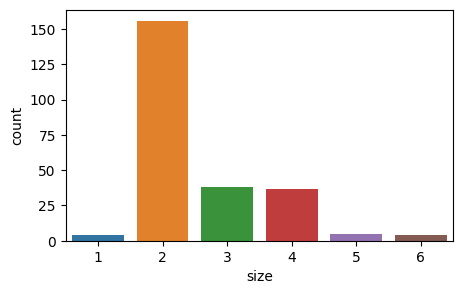

In [10]:
#Majority of the customers come in what size
plt.figure (figsize = (5,3))
sns.countplot(x =data['size'])

Text(0.5, 1.0, 'Tips')

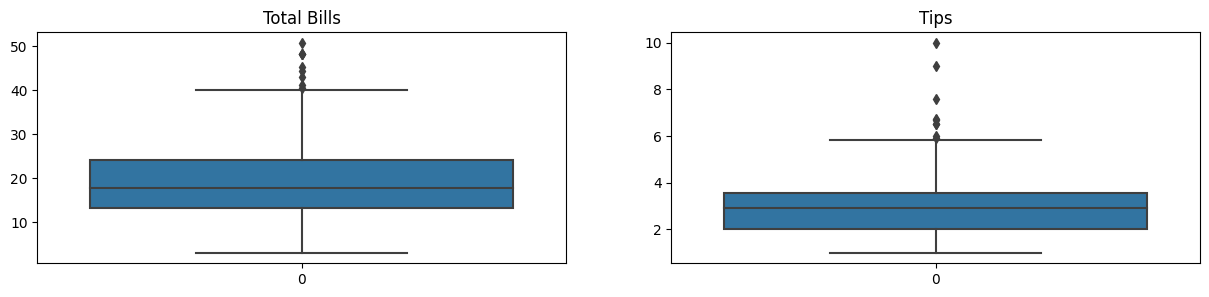

In [11]:
#Visualise the total bill and tips paid by customer ( categorise the customer range for total bill and tips)
fig, axes = plt.subplots (nrows =1, ncols = 2, figsize=(15,3))

sns.boxplot(data['total_bill'], ax = axes[0])
axes[0].set_title("Total Bills")

sns.boxplot (data['tip'], ax = axes[1])
axes[1].set_title("Tips")



#Bivariate Analysis

In [21]:
#what is the total bill paid by Sex(female and male)
total_billsex = data.groupby('sex')['total_bill'].sum().reset_index()
total_billsex



,sex,total_bill
0,Male,3256.82
1,Female,1570.95


<Axes: xlabel='sex', ylabel='total_bill'>

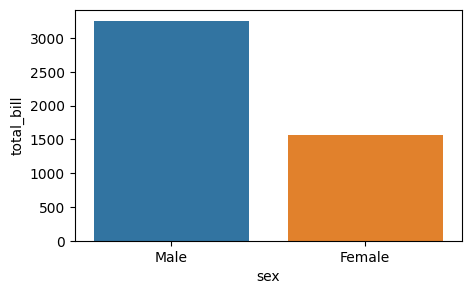

In [13]:
#This is to visualise the what is the total bill paid by Sex(female and male)
plt.figure (figsize = (5,3))
sns.barplot(x ='sex', y ='total_bill', data = total_billsex)


<Axes: xlabel='smoker', ylabel='tip'>

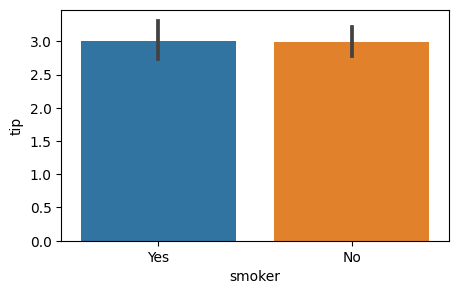

In [14]:
#Do customers that smoke give better tips
plt.figure (figsize = (5,3))
sns.barplot(x ='smoker', y ='tip', data = data)

Text(0.5, 1.0, 'Total Tips by sex')

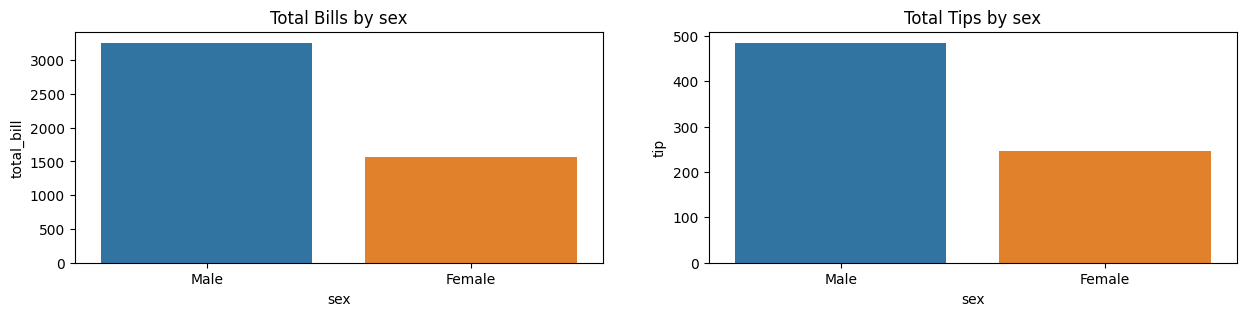

In [20]:
from matplotlib.pyplot import axes
#what is the total bill by sex and total tips by sex
fig, axes = plt.subplots (nrows =1, ncols = 2, figsize=(15,3))

total_billsex = data.groupby('sex')['total_bill'].sum().reset_index()
sns.barplot(x = 'sex', y = 'total_bill', data = total_billsex, ax = axes[0])
axes[0].set_title("Total Bills by sex")

total_tipsex = data.groupby('sex')['tip'].sum().reset_index()
sns.barplot(x = 'sex', y = 'tip', data = total_tipsex, ax = axes[1])
axes[1].set_title("Total Tips by sex")

<Axes: xlabel='total_bill', ylabel='tip'>

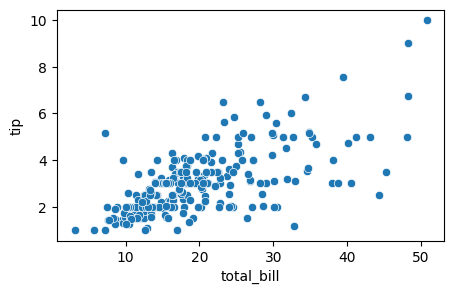

In [16]:
#Is there any relationship between total bill and tips paid by customer?
plt.figure (figsize = (5,3))
sns.scatterplot(x ='total_bill', y ='tip', data = data)

#Multivariate Analysis

<Axes: xlabel='total_bill', ylabel='tip'>

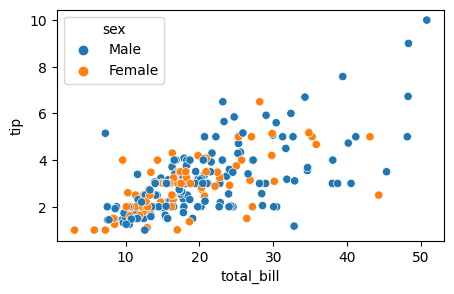

In [17]:
# Is there any relationship between total bill and tip by gender
plt.figure (figsize = (5,3))
sns.scatterplot(x ='total_bill', y ='tip', data = data, hue = 'sex')

<ipython-input-18-a4d54b1d94db>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<Axes: >

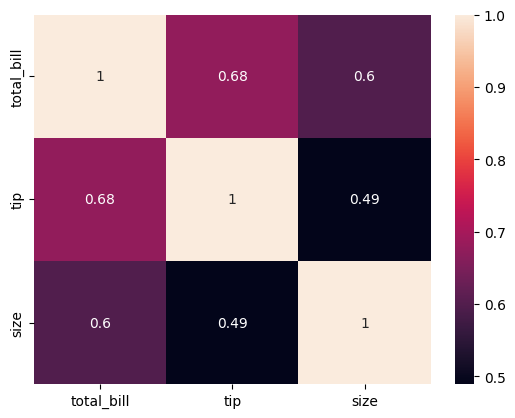

In [18]:
#which features have the strongest relationship( To know who is giving more tips)
sns.heatmap(data.corr(), annot = True)